# **Daegu Apartment**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

**Context**

Dalam masyarakat modern, pertumbuhan populasi dan aktivitas bisnis yang padat di daerah perkotaan telah menyebabkan terbatasnya lahan perumahan. Dalam situasi seperti ini, apartemen telah menjadi salah satu solusi yang populer untuk memenuhi kebutuhan perumahan. Apartemen menawarkan manfaat berupa penggunaan lahan yang lebih efisien dan aksesibilitas yang lebih baik ke berbagai fasilitas dan layanan kota.

Dalam konteks ini, penting untuk memahami dan menganalisis faktor-faktor yang mempengaruhi harga apartemen. Harga apartemen dipengaruhi oleh berbagai variabel internal, seperti ukuran apartemen, jumlah fasilitas yang tersedia di dalam dan sekitar kompleks apartemen, tahun pembangunan, dan fitur-fitur lainnya. Selain itu, ada juga faktor-faktor eksternal, seperti lokasi apartemen, aksesibilitas ke fasilitas umum, keamanan lingkungan, dan kondisi pasar perumahan.

Dengan meneliti hubungan antara harga apartemen dan faktor-faktor ini, dapat diperoleh wawasan yang berharga bagi pemilik, pembeli dan penyewa apartemen. Analisis ini dapat membantu pemilik apartemen dalam menentukan harga jual yang tepat dan calon pembeli atau penyewa dapat memilih apartemen yang sesuai dengan kebutuhan dan anggaran mereka.

**Problems Statement**

Dalam konteks pasar apartemen, masalah utama yang dihadapi oleh pemilik apartemen adalah menentukan harga jual yang tepat. Pemilik apartemen ingin mendapatkan keuntungan maksimal dari penjualan unit mereka, tetapi juga harus mempertimbangkan harga pasar dan preferensi calon pembeli. Harga yang terlalu tinggi dapat mengakibatkan kesulitan dalam melakukan penjualan, sementara harga yang terlalu rendah dapat menyebabkan pemilik kehilangan potensi keuntungan.

Untuk itu, diperlukan analisis mendalam terhadap faktor-faktor internal dan eksternal yang mempengaruhi harga apartemen. Penelitian ini bertujuan untuk mengeksplorasi hubungan antara harga apartemen dengan berbagai variabel seperti ukuran apartemen, fasilitas di sekitarnya, jarak ke stasiun kereta bawah tanah, tahun pembangunan, dan lainnya.

**Goals**

Dengan mengetahui faktor-faktor yang paling berpengaruh terhadap harga apartemen, pemilik apartemen dapat mengambil keputusan yang lebih tepat dalam menentukan harga jualnya. Selain itu, dengan memanfaatkan teknik analisis data dan machine learning, diharapkan dapat dikembangkan model prediksi harga apartemen yang akurat untuk membantu pemilik apartemen menyesuaikan harga mereka dengan harga pasar secara lebih efektif. Tujuan akhir dari penelitian ini adalah membantu pemilik apartemen dalam mencapai keuntungan maksimal dari penjualan unit mereka dan mengoptimalkan keputusan bisnis mereka.

**Analytic Approach**

- Analisis Faktor-Faktor yang Mempengaruhi Harga: 
    - Melakukan analisis statistik dan eksplorasi untuk mengidentifikasi faktor-faktor yang paling berpengaruh terhadap harga apartemen. Ini dapat dilakukan dengan menggunakan teknik analisis statistik untuk mengukur korelasi antara variabel-variabel yang ada dengan harga jual apartemen.

- Penggunaan Teknik Machine Learning: 
    - Menggunakan teknik machine learning untuk mengembangkan model prediksi harga apartemen. Model ini akan mengambil input berupa data karakteristik apartemen dan menghasilkan prediksi harga jualnya berdasarkan pola dan tren dari data yang ada.

**Metric Evaluation**

Untuk mengevaluasi performa model regresi dalam memprediksi harga jual apartmen, kita akan menggunakan tiga metrik evaluasi: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error). RMSE adalah nilai rata-rata dari akar kuadrat dari selisih antara nilai prediksi dan nilai sebenarnya. MAE adalah nilai rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya. Sedangkan MAPE adalah nilai rata-rata dari persentase kesalahan absolut yang dihasilkan oleh model.

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan oleh model, semakin akurat model tersebut dalam memprediksi harga sewa sesuai dengan fitur-fitur yang digunakan. Dengan menggunakan tiga metrik evaluasi ini, kita dapat mendapatkan gambaran menyeluruh tentang kinerja model regresi dalam memprediksi harga jual apartemen dan memastikan bahwa model memberikan prediksi yang akurat dan sesuai dengan data yang ada.

## **Data Understanding**

- Dataset merupakan data penjualan Apartment di kota Daegu, Korea Selatan.
- Setiap baris data merepresentasikan informasi terkait properti dan pemiliknya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Hallway Type | Object | Jenis apartemen |
| TimeToSubway | Object | Waktu yang dibutuhkan untuk mencapai stasiun kereta bawah tanah terdekat |
| SubwayStation | Object | Nama stasiun kereta bawah tanah terdekat |
| N_FacilitiesNearBy(ETC) | Int | Jumlah fasilitas di sekitarnya |
| N_FacilitiesNearBy(PublicOffice) | Integer | Jumlah fasilitas kantor publik di sekitarnya |
| N_SchoolNearBy(University) | Integer | Jumlah universitas di sekitarnya |
| N_Parkinglot(Basement) | Integer | Jumlah tempat parkir di bawah tanah |
| YearBuilt | Integer | Tahun apartemen dibangun |
| N_FacilitiesInApt | Integer | Jumlah fasilitas di dalam apartemen |
| Size(sqft) | Integer | Ukuran apartemen (dalam kaki persegi) |
| SalePrice | Integer | Harga apartemen (Won) |

<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [91]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [4]:
df.describe(include='object')

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [92]:
# Check Duplicated Data
df.duplicated().sum()

1422

In [6]:
# Hapus Data Duplicated
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.shape

(2701, 11)

In [8]:
#Check missing values
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

## **Explorasi Data Analysis**

### **Distribution Data SalePrice**

In [9]:
# Membuat subplot berisi 2 baris dan 1 kolom
fig = make_subplots(rows=2, cols=1)

# Menambahkan grafik boxplot kolom SalePrice di baris pertama
fig.add_trace(
    px.box(df, x="SalePrice").data[0],
    row=1, col=1
)

# Menambahkan grafik histogram kolom SalePrice di baris ke dua
fig.add_trace(
    px.histogram(df, x="SalePrice", marginal="rug").data[0],
    row=2, col=1
)

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Distribution of Sale Price",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# Menampilkan subplot
fig.show()

Berdasarkan grafik distribusi **Sale Price** terlihat data cenderung *right skew* serta distribusi data didominasi dari rentang nilai sebesar **153K - 300K**

In [10]:
stat, pvalue = normaltest(df['SalePrice'])

if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue {pvalue:.5f} data tidak terdistribusi normal')

pvalue 0.00000 data tidak terdistribusi normal


Dari grafik **SalePrice Distribution Plot** terlihat bahwa **skewness** dan **pvalue** dibawah nilai **0.05** sehingga **SalePrice** dapat diasumsikan sebagai **Data Tidak Terdistribusi Normal**. Dengan kata lain, data **SalePrice** tidak terdistribusi secara normal, sehingga tidak memenuhi asumsi distribusi normal dalam analisis statistik tertentu. Hal ini perlu diperhatikan saat melakukan analisis lebih lanjut dan pemodelan terhadap data tersebut. Solusinya adalah menggunakan metode statistik non-parametrik yang sesuai untuk menganalisis data yang tidak terdistribusi normal.

### **Analisis Data SalePrice(Target) Terhadap Kolom Numeric**

In [11]:
# membuat grafik line plot
fig = px.line(df.groupby('YearBuilt')[['SalePrice']].median().reset_index(), 
              x='YearBuilt', 
              y='SalePrice', 
              markers=True)

# menambahkan anotasi
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.10,
                        text='( *Tren harga jual apartement menunjukkan hal yang positif)',
                             font=dict(family='Arial', size=12),
                        showarrow=False))

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Tren Penjualan Apartement Berdasarkan Tahun Pembangunan",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grfaik
fig.update_layout(annotations=annotations)
fig.show()

Berdasarkan grafik tren SalePrice diatas menjunjukkan bahwa semakin bertambah **YearBuilt** semakin tinggi juga **SalePrice** nya. Artinya, secara umum, properti dengan tahun pembangunan yang lebih baru cenderung memiliki harga jual yang lebih tinggi dibandingkan dengan properti yang lebih lama.

Korelasi diantara **YearBuilt** dan **SalePrice** ini bisa menjadi hasil yang diharapkan karena biasanya properti yang lebih baru memiliki fitur dan fasilitas yang lebih modern, lebih baik dalam kualitas konstruksi, dan mungkin berada di lokasi yang lebih strategis. Semakin baru properti, semakin besar kemungkinan untuk memiliki permintaan yang tinggi di pasar, yang dapat mendorong harga jualnya naik.

In [12]:
# membuat grafik scatter plot
fig = px.scatter(df, x="Size(sqf)", y="SalePrice", trendline="lowess")

# menambahkan anotasi
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.1,
                        text='( *Korelasi Antara SalePrice dengan Size Menunjukkan Hubungan yang Positif)',
                             font=dict(family='Arial', size=12),
                        showarrow=False))

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Hubungan Antara Harga Penjualan Dengan Ukuran Apartemen",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grfaik
fig.update_layout(annotations=annotations)
fig.show()

Berdasarkan grafik hubungan antara **SalePrice** dengan **Size(sqf)** menunjukkan korelasi postif. Dapat disimpulkan bahwa semakin tinggi **Size(sqf)** (ukuran apartemen dalam kaki persegi), semakin tinggi pula harga **SalePrice** (harga jual) nya. Artinya, secara umum, terdapat kecenderungan bahwa apartemen dengan ukuran yang lebih besar cenderung memiliki harga jual yang lebih tinggi dibandingkan dengan apartemen yang lebih kecil.

Korelasi positif antara `ukuran apartemen` dan `harga jualnya` adalah hal yang umum dalam pasar properti. Semakin besar `ukuran apartemen`, semakin banyak ruang yang tersedia, yang bisa dianggap sebagai nilai tambah bagi calon pembeli. Ukuran yang lebih besar mungkin berarti lebih banyak ruang untuk tempat tinggal atau kebutuhan lain, seperti ruang tambahan, ruang keluarga, atau fasilitas tambahan. Hal ini dapat meningkatkan daya tarik apartemen dan menyebabkan `kenaikan harga jualnya`.

### **Analisis Data SalePrice(Target) Terhadap Kolom Category**

In [13]:
# membuat grafik bar plot
fig = go.Figure(data=[go.Bar(
            x=df.groupby("HallwayType")[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=False)['HallwayType'], 
            y=df.groupby("HallwayType")[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=False)['SalePrice'],
            text=df.groupby("HallwayType")[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=False)['SalePrice'],
            textposition='auto',
            )])

# menambahkan anotasi
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.2,
                        text='( *Tipe apartement berdasarkan median SalePrice teringgi adalah Tipe Terrace)',
                             font=dict(family='Arial', size=12),
                        showarrow=False))

# Update layout untuk membuat bingkai
fig.update_layout(
    title_text="Tipe Apartement Berdasarkan Sale Price",
    xaxis_title="Tipe Apartement",
    yaxis_title="Sale Price",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.update_layout(annotations=annotations)
fig.show()

Berdasarkan grafik diatas terlihat bahwa **Tipe Apartement** dengan tipe **terraced** memiliki *median SalePrice* tertinggi. Dapat disimpulkan bahwa apartemen dengan **tipe terraced** memiliki harga jual yang lebih tinggi dibandingkan dengan tipe apartemen lainnya yang ada dalam data tersebut. **Tipe apartemen terraced** mungkin menawarkan fitur atau karakteristik khusus yang dianggap lebih bernilai bagi calon pembeli.

In [14]:
# membuat grafik bar plot
fig = go.Figure(data=[go.Bar(
            x=df.groupby(['SubwayStation'])[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=False)['SubwayStation'], 
            y=df.groupby(['SubwayStation'])[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=False)['SalePrice'],
            text=df.groupby(['SubwayStation'])[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=False)['SalePrice'],
            textposition='auto',
            )])

# menambahkan anotasi
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.26,
                        text='( *Harga Jual Apartemen di Sekitar Banwoldang Tertinggi)',
                             font=dict(family='Arial', size=12),
                        showarrow=False))

# Update layout untuk bingkai
fig.update_layout(
    title_text="Tren Median Harga Jual Apartemen Berdasarkan Public Transportation",
    xaxis_title="SubwayStation",
    yaxis_title="Median Sale Price",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.update_layout(annotations=annotations)
fig.show()

**Banwoldang** **SubwayStation** memiliki nilai median **SalePrice** apartment yang paling tinggi dibanding **SubwayStation** yang lain. Hal ini menunjukkan bahwa **Banwoldang SubwayStation** mungkin berlokasi di daerah yang lebih premium atau strategis, yang membuat properti di sekitar stasiun ini memiliki nilai lebih tinggi. 

In [15]:
fig = px.bar(df.groupby(['SubwayStation', 'TimeToSubway'])[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=False),
             x="SubwayStation", 
             color="SalePrice", 
             text="TimeToSubway",
             template="simple_white"
             )

annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.15,
                        text='( *Subway Station dengan Sale Price Apartment tertinggi berada di Banwoldang dan Kyungbuk Uni Hospital\n',
                             font=dict(family='Arial', size=12),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.07,
                        text='   dengan waktu tempuh sekitar 0 - 5 menit)',
                             font=dict(family='Arial', size=12),
                        showarrow=False))


# Update layout to set proper titles and axis labels
fig.update_layout(
    title_text="Harga Jual Apartemen Berdasarkan Waktu Tempuh Menuju Public Transportation",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=900,
    height=400,
    template="simple_white"
)

fig.update_layout(annotations=annotations, barmode='group', xaxis_tickangle=45)
fig.show()

Jika ditinjau berdasarkan waktu tempuh ke **SubwayStation**, **SubwayStation** **Banwoldang** dan **Kyungbuk_uni_hospital** memiliki `jarak tempuh paling pendek` serta `harga jual` apartemen yang tinggi. Hal ini menandakan bahwa adanya kemudahan akses ke stasiun kereta bawah memungkinkan para penghuni untuk dengan cepat dan mudah berpindah ke berbagai lokasi penting di sekitar daerah tersebut, seperti tempat kerja, perguruan tinggi, rumah sakit, pusat perbelanjaan, dan fasilitas umum lainnya. Kondisi ini dapat meningkatkan daya tarik lokasi tersebut dan dianggap sebagai nilai tambah bagi calon pembeli karena memudahkan aksesibilitas dan mobilitas.

### **Analisis Data SalePrice(Target) Terhadap Data Fasilitas Apartement**

In [16]:
# membuat subplot berisi 2 baris dan 1 kolom
fig = make_subplots(rows=2, cols=1)

# menambahkan grafik boxplot pada kolom ke-1 baris ke-1
fig.add_trace(
    px.box(df, x="N_FacilitiesNearBy(ETC)", y='SalePrice').data[0],
    row=1, col=1
)

# menambahkan grafik histogram pada baris ke 2 kolom ke 1
fig.add_trace(
    px.histogram(df, y="SalePrice", x="N_FacilitiesNearBy(ETC)", histfunc='count').data[0],
    row=2, col=1
)

# Update layout untuk membuar bingkai
fig.update_layout(
    title_text="Distribusi Data Antara SalePrice dengan N_FacilitiesNearBy(ETC)",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.show()

Grafik Box Plot menunjukkan bahwa ketika jumlah fasilitas di sekitar apartemen **(N_FacilitiesNearBy(ETC))** semakin rendah, median dan kuartil atas dari **SalePrice** cenderung lebih tinggi, dan distribusi data lebih terkonsentrasi di rentang harga yang lebih tinggi. 

Hal ini menunjukkan bahwa **N_FacilitiesNearBy(ETC)** yang `lebih rendah` memiliki kecenderungan `harga jual yang lebih tinggi`, dan sebaliknya, apartemen dengan **N_FacilitiesNearBy(ETC)** yang lebih tinggi cenderung memiliki `harga jual yang lebih rendah`. Hal ini dapat dijadikan pertimbangan bagi calon pembeli atau pemilik apartemen untuk memahami bagaimana jumlah fasilitas di sekitar apartemen dapat mempengaruhi harga jualnya.

In [17]:
# Membuat subplot berisi 2 baris dan 1 kolom
fig = make_subplots(rows=2, cols=1)

# menambahkan grafik boxplot di baris pertama
fig.add_trace(
    px.box(df, x="N_FacilitiesNearBy(PublicOffice)", y='SalePrice').data[0],
    row=1, col=1
)

# menambahkan baris histogram di baris ke dua
fig.add_trace(
    px.histogram(df, y="SalePrice", x="N_FacilitiesNearBy(PublicOffice)", histfunc='count').data[0],
    row=2, col=1
)

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Distribusi Data Antara SalePrice dengan dengan N_FacilitiesNearBy(PublicOffice)",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.show()

`Fluktuasi` dalam jumlah fasilitas di sekitar apartemen yang termasuk kantor publik **(N_FacilitiesNearBy(PublicOffice))** mungkin menunjukkan `variasi yang lebih besar dalam permintaan pembeli` terhadap apartemen dengan akses ke kantor publik. Hal ini bisa disebabkan oleh perbedaan lokasi, tipe kantor publik, atau fasilitas lainnya yang mungkin mempengaruhi harga dan permintaan.

In [18]:
# Membuat subplot berisi 2 baris dan 1 kolom
fig = make_subplots(rows=2, cols=1)

# menambahkan grafik boxplot di baris pertama
fig.add_trace(
    px.box(df, x="N_SchoolNearBy(University)", y='SalePrice').data[0],
    row=1, col=1
)

# menambahkan baris histogram di baris ke dua
fig.add_trace(
    px.histogram(df, y="SalePrice", x="N_SchoolNearBy(University)", histfunc='count').data[0],
    row=2, col=1
)

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Distribusi Data Antara SalePrice dengan dengan N_SchoolNearBy(University)",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.show()

Grafik Box Plot menunjukkan bahwa ketika ada dua universitas yang berdekatan **(N_SchoolNearBy(University)=2)**, median dan kuartil atas dari **SalePrice** cenderung lebih tinggi dan distribusi data lebih terkonsentrasi di rentang harga yang lebih tinggi. Hal ini menunjukkan bahwa apartemen yang memiliki akses dekat ke dua universitas mungkin lebih menarik bagi calon pembeli, sehingga memiliki harga jual yang lebih tinggi dan lebih tinggi tingkat penjualan.

In [19]:
# Membuat subplot berisi 2 baris dan 1 kolom
fig = make_subplots(rows=2, cols=1)

# menambahkan grafik boxplot di baris pertama
fig.add_trace(
    px.box(df, x="N_Parkinglot(Basement)", y='SalePrice').data[0],
    row=1, col=1
)

# menambahkan baris histogram di baris ke dua
fig.add_trace(
    px.histogram(df, y="SalePrice", x="N_Parkinglot(Basement)", histfunc='count').data[0],
    row=2, col=1
)

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Distribusi Data Antara SalePrice dengan dengan N_Parkinglot(Basement)",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.show()

Grafik Box Plot menunjukkan bahwa ketika jumlah tempat parkir di basement **(N_Parkinglot(Basement))** semakin tinggi, median dan kuartil atas dari **SalePrice** cenderung lebih tinggi, dan distribusi data lebih terkonsentrasi di rentang harga yang lebih tinggi. Hal ini menunjukkan bahwa apartemen dengan `jumlah tempat parkir yang lebih besar` di basement mungkin lebih menarik bagi calon pembeli, sehingga memiliki `harga jual yang lebih tinggi`.

In [20]:
# Membuat subplot berisi 2 baris dan 1 kolom
fig = make_subplots(rows=2, cols=1)

# menambahkan grafik boxplot di baris pertama
fig.add_trace(
    px.box(df, x="N_FacilitiesInApt", y='SalePrice').data[0],
    row=1, col=1
)

# menambahkan baris histogram di baris ke dua
fig.add_trace(
    px.histogram(df, y="SalePrice", x="N_FacilitiesInApt", histfunc='count').data[0],
    row=2, col=1
)

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Distribusi Data Antara SalePrice dengan dengan N_FacilitiesInApt",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.show()

Grafik Box Plot menunjukkan bahwa ketika jumlah fasilitas dalam apartemen **(N_FacilitiesInApt)** semaki tinggi, median dan kuartil atas dari **SalePrice** cenderung lebih tinggi. Hal ini menunjukkan bahwa apartemen dengan jumlah fasilitas yang lebih lengkap dalam unitnya mungkin lebih menarik bagi calon pembeli.

**Berdasarkan grafik hubungan antara **SalePrice** dengan **Facilitas** yang dimiliki apartement terlihat bahwa:**

1. Semakin rendah **N_FacilitiesNearBy(ETC)** lebih banyak terjual
2. Jumlah **N_FacilitiesNearBy(PublicOffice)** lebih fluktuatif terhadap penjualan apartement
3. **N_SchoolNearBy(University)** yang berjumlah 2 lebih diminati calon pembeli
4. Semakin besar kapasitas **N_Parkinglot(Basement)** semakin tinggi pula harga jual apartement
5. Semakin banyak **N_FacilitiesInApt** yang diberikan semakin tinggi pula harga jual apartement-nya 

### **Analisis Tambahan**

**Klasifikasi Size**

- Studio / Efficiency: Kurang dari 300 sqf
- Apartemen Kecil: 300 - 500 sqf
- Apartemen Sedang: 501 - 800 sqf
- Apartemen Menengah: 801 - 1000 sqf
- Apartemen Besar: Lebih dari 1000 sqf

In [21]:
df2 = df.copy()

ket = []

for i in df['Size(sqf)']:
    if i < 300:
        ket.append('Studio')
    elif 300 < i <= 500:
        ket.append('Apartment Kecil')
    elif 501 < i <=800:
        ket.append('Apartment Sedang')
    elif 801 < i <=1000:
        ket.append('Apartment Menengah')
    else:
        ket.append('Apartment Besar')

df2['keterangan'] = pd.DataFrame(ket)

In [22]:
# buat data frame baru untuk visualisasi
gb1 = df2.groupby(['keterangan','YearBuilt'])[['SalePrice']].count().reset_index().sort_values('YearBuilt', ascending=True)
gb1.rename(columns={'SalePrice':'count'}, inplace=True)

# menampilkan grafik bar plot
fig = px.line(gb1, x='YearBuilt', y='count', color='keterangan',
             labels={'SalePrice':'Count'}, height=400)

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text="Tren Penjualan Apartemen Berdasarkan Tahun Pembangunan Rentang 1978 - 2015",
    xaxis_title="Tahun",
    yaxis_title="Count",
    showlegend=True,
    width=800,
    height=400,
    template="simple_white"
)

# Menandai kenaikan signifikan antara tahun 2005 dan 2010
fig.add_annotation(text="Kenaikan Signifikan",
                   x=2007,
                   y=gb1[gb1['YearBuilt'] == 2005]['count'].max() + 250,
                   showarrow=True,
                   arrowhead=1)

# menampilkan grafik
fig.show()

Tren penjualan apartemen cenderung meningkat pada rentang tahun pembuatan **2005** hingga **2008**. Peningkatan ini mengindikasikan bahwa apartemen yang dibangun pada periode tersebut memiliki daya tarik yang lebih tinggi bagi calon pembeli dibandingkan dengan tahun pembuatan lainnya. Potensi alasan dibalik tren ini bisa beragam, seperti desain yang lebih modern, fasilitas yang lebih lengkap, atau lokasi yang strategis. Kenaikan penjualan pada periode ini bisa dijadikan peluang bagi pemilik apartemen dan pengembang untuk lebih memahami preferensi pasar dan menerapkan strategi yang lebih efektif

**Klasifikasi SalePrice**

- Harga Murah: Kurang dari 100 juta KRW
- Harga Terjangkau: 100 juta KRW - 300 juta KRW
- Harga Menengah: 301 juta KRW - 500 juta KRW
- Harga Tinggi: 501 juta KRW - 1 miliar KRW
- Harga Sangat Tinggi: Lebih dari 1 miliar KRW

In [23]:
ket2 = []

for a in df2['SalePrice']:
    if a < 100000:
        ket2.append('Murah')
    elif 100000 < a <= 300000:
        ket2.append('Terjangkau')
    elif 300001 < a <= 500000:
        ket2.append('Menengah')
    elif 500001 < a <= 1000000:
        ket2.append('Tinggi')
    else:
        ket2.append('Sangat Tinggi')

df2['Keterangan_Harga'] = pd.DataFrame(ket2)

In [24]:
# buat data frame baru untuk visualisasi
gb2 = df2.groupby(['keterangan','Keterangan_Harga'])[['SalePrice']].median().reset_index().sort_values('SalePrice', ascending=True)

# menampilkan grafik bar plot
fig = px.bar(gb2, x='keterangan', color='SalePrice',
             labels={'Keterangan_Harga':'Count'}, height=400)

annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.15,
                        text='( *semakin besar luas apartemen harga jual apartemen akan semakin tinggi\n',
                             font=dict(family='Arial', size=12),
                        showarrow=False))

# Update layout to set proper titles and axis labels
fig.update_layout(
    title_text="Harga Jual Apartemen Berdasarkan Tipe Luas Apartemen",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=900,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.update_layout(annotations=annotations, barmode='group', xaxis_tickangle=45)
fig.show()

Seperti analisis data pada kolom numerik tentang distribusi data **SalePrice** dengan **Size(sqf)** diambil kesimpulan bahwa semakin tinggi **Size(sqf)** nya semakin tinggi pula **SalePrice** nya dengan luas **Size(sqf)** berada di angka lebih dari `1000 sqf`

### **Data Correlation**

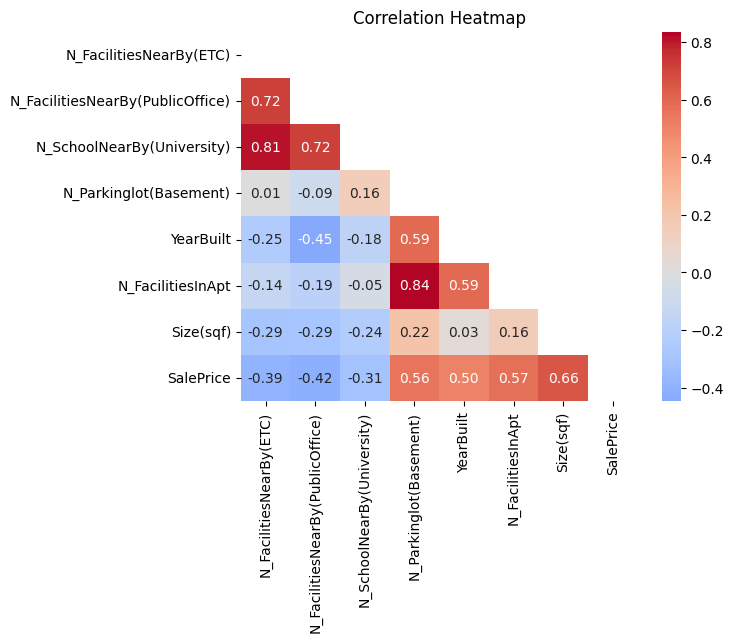

In [25]:
df_corr = df.corr(numeric_only=True)

matriks = np.triu(df_corr)

sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0 , mask=matriks, fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

**Interpretasi**

1. Korelasi kuat positif antara `SalePrice` dan `Size(sqf)`:
    - Korelasi yang kuat positif antara `SalePrice` dan `Size(sqf)` menunjukkan bahwa ada hubungan yang kuat antara ukuran apartemen `Size(sqf)` dengan harga jualnya `SalePrice`. 
    - Artinya, semakin luas ukuran apartemen, semakin tinggi pula harga jualnya. 
    - Ini wajar, karena apartemen yang lebih besar biasanya memiliki nilai lebih tinggi dan lebih mahal.

2. Korelasi kuat antara `N_FacilitiesNearBy(ETC)` dengan `N_SchoolNearBy(University)` dan `N_FacilitiesNearBy(PublicOffice)`:
    - Korelasi yang kuat antara `N_FacilitiesNearBy(ETC)` dengan `N_SchoolNearBy(University)` dan `N_FacilitiesNearBy(PublicOffice)` menunjukkan bahwa ada hubungan yang erat antara jumlah fasilitas di sekitar apartemen *(ETC)* dengan jumlah universitas di sekitar *(University)* dan jumlah kantor publik di sekitar *(PublicOffice)*. 
    - Artinya, daerah dengan banyak fasilitas di sekitar (seperti toko, restoran, taman, dll.) cenderung juga memiliki lebih banyak universitas dan kantor publik, atau sebaliknya. 
    - Ini mungkin menunjukkan bahwa kawasan yang ramai dengan fasilitas *ETC* lebih menarik bagi *universitas* dan *kantor publik*, atau bahwa *universitas* dan *kantor publik* mengalami pertumbuhan di daerah dengan banyak fasilitas.

3. Korelasi kuat antara `N_Parkinglot(Basement)` dengan `SalePrice`, `N_Facilities(Apt)`, `YearBuilt`:
    - Korelasi yang kuat antara `N_Parkinglot(Basement)` dengan `SalePrice`, `N_Facilities(Apt)`, dan `YearBuilt` menunjukkan bahwa jumlah tempat parkir di basement *(Basement)* memiliki hubungan yang kuat dengan harga jual
    *(SalePrice)*, jumlah fasilitas dalam apartemen *(N_Facilities(Apt))*, dan tahun pembangunan apartemen *(YearBuilt)*
    - Artinya, apartemen dengan jumlah tempat parkir basement yang lebih banyak cenderung memiliki harga jual yang lebih tinggi, memiliki lebih banyak fasilitas dalam unitnya, dan mungkin juga merupakan apartemen yang lebih baru atau telah direnovasi.

Perlu dicatat bahwa korelasi hanya mengukur hubungan linear antara dua variabel dan tidak menyiratkan hubungan sebab-akibat. 

## **Data Preparation**

Pada tahap ini, kita akan dilakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan digunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [26]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[corridor, mixed, terraced]"
1,TimeToSubway,object,0,0.0,5,"[10min~15min, 0-5min, 15min~20min]"
2,SubwayStation,object,0,0.0,8,"[Banwoldang, Sin-nam, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[1.0, 5.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[5.0, 4.0, 2.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[56.0, 1321.0, 536.0]"
7,YearBuilt,int64,0,0.0,16,"[2005, 2007, 1985]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[8, 9, 3]"
9,Size(sqf),int64,0,0.0,89,"[1085, 1327, 779]"


Dari info dataset diatas terlihat bahwa, data sudah tidak ada **missing values**, **duplicated**. Selanjutnya akan dilakukan tahap **data pre-processing**

Langkah selanjutnya akan dilakukan checking outliers. Jika terdapat data **outlier** yang tinggi akan dilakukan analisis terhadap fiturnya.

### **Outliers Detection**

In [27]:
# membuat subplots berisikan 2 baris dan 2 kolom
fig = make_subplots(rows=2, cols=1)

fig = make_subplots(
    rows=8, cols=1,
    subplot_titles=('N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                    'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
                    'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'))

fig.add_trace(
    px.box(df, x="N_FacilitiesNearBy(ETC)").data[0],
    row=1, col=1
)

fig.add_trace(
    px.box(df, x="N_FacilitiesNearBy(PublicOffice)").data[0],
    row=2, col=1
)

fig.add_trace(
    px.box(df, x="N_SchoolNearBy(University)").data[0],
    row=3, col=1
)

fig.add_trace(
    px.box(df, x="N_Parkinglot(Basement)").data[0],
    row=4, col=1
)

fig.add_trace(
    px.box(df, x="YearBuilt").data[0],
    row=5, col=1
)

fig.add_trace(
    px.box(df, x="N_FacilitiesInApt").data[0],
    row=6, col=1
)

fig.add_trace(
    px.box(df, x="Size(sqf)").data[0],
    row=7, col=1
)

fig.add_trace(
    px.box(df, x="SalePrice").data[0],
    row=8, col=1
)

# Update layout untuk mengatur bingkai
fig.update_layout(
    title_text=" ",
    xaxis_title=" ",
    yaxis_title=" ",
    showlegend=False,
    width=800,
    height=900
)

# menampilkan grafik
fig.show()

In [28]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal
numerical_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,N_FacilitiesNearBy(ETC),-7.5,12.5,0,2701,0,0.00
1,N_FacilitiesNearBy(PublicOffice),0.0,8.0,0,2701,0,0.00
2,N_SchoolNearBy(University),-1.0,7.0,0,2701,0,0.00
3,N_Parkinglot(Basement),-744.5,1723.5,0,2701,0,0.00
4,YearBuilt,1972.0,2028.0,0,2701,0,0.00
5,N_FacilitiesInApt,-0.5,11.5,0,2701,0,0.00
6,Size(sqf),107.0,1803.0,0,2617,84,3.11
7,SalePrice,-67478.5,521901.5,0,2684,17,0.63


**Outliers** terdeteksi pada kolom **Size(sqf)** dan **SalePrice**. Diambil keputusan untuk tidak menghapus **outliers** karena prosentase data nya tergolong kecil yaknik sekitar 3%

In [29]:
df.shape

(2701, 11)

Data yang sudah clean akan di gunakan sebagai data source untuk pemodelan nantinya sebesar **2701** baris dan **11** kolom

## **Data Preprocessing**

### **1. Spliting Dataset**

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

In [31]:
# define fitur (X)
X = df.drop(columns=['SalePrice'])

# define target (y)
y = df['SalePrice']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### **2. Scaling and Encoding**

In [32]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,HallwayType,3,"[corridor, mixed, terraced]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Bangoge, Banwoldang, Chil-sung-market, Daegu, Kyungbuk_uni_hospital, Myung-duk, Sin-nam, no_subway_nearby]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 2.0, 5.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]"
5,N_SchoolNearBy(University),6,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
6,N_Parkinglot(Basement),20,"[0.0, 18.0, 56.0, 76.0, 79.0, 108.0, 181.0, 184.0, 203.0, 218.0, 400.0, 475.0, 524.0, 536.0, 605.0, 798.0, 930.0, 1174.0, 1270.0, 1321.0]"
7,YearBuilt,16,"[1978, 1980, 1985, 1986, 1992, 1993, 1997, 2003, 2005, 2006, 2007, 2008, 2009, 2013, 2014, 2015]"
8,N_FacilitiesInApt,9,"[1, 2, 3, 4, 5, 7, 8, 9, 10]"
9,Size(sqf),89,"[135, 138, 156, 160, 163, 192, 206, 213, 273, 277, 281, 288, 355, 426, 430, 451, 498, 508, 547, 558, 572, 576, 587, 636, 640, 644, 676, 736, 743, 779, 793, 811, 814, 818, 829, 832, 839, 843, 846, 857, 868, 871, 903, 907, 910, 914, 1035, 1060, 1085, 1088, 1092, 1103, 1131, 1149, 1160, 1167, 1184, 1192, 1252, 1256, 1273, 1288, 1291, 1313, 1327, 1334, 1366, 1369, 1377, 1387, 1394, 1412, 1419, 1437, 1444, 1448, 1451, 1483, 1519, 1629, 1643, 1690, 1743, 1761, 1796, 1928, 2056, 2092, 2337]"


Sekarang mari kita melakukan fitur encoding dan juha fitur scaling untuk fitur-fitur categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `TimeToSubway` menggunakan Binary Encoder, karena data ini memiliki beberapa kategori atau label yang tidak memiliki urutan tertentu, dan tidak ingin memberikan urutan atau tingkatan tertentu dalam kategori tersebut.
2. Merubah fitur/kolom `SubwayStation` menggunakan One Hot Encoding, karena fitur ini tidak ada urutan.
4. Merubah fitur/kolom `HallwayType` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan.
3. Keseluruhan fitur kecuali data target **(SalePrice)** akan dilakukan scaler dengan `RobustScaler`

**Encoder**

In [33]:
# column transformer (menyatukan beberapa tahap preprocesing secara sekaligus)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [34]:
transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(), ['HallwayType', 'SubwayStation']),
    ('Binary', ce.BinaryEncoder(), ['TimeToSubway']),
], remainder='passthrough')

**Scaling**

Kita akan menggunakan Robust Scaler karena data kita memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier. Kita dapat mengatur ulang scaler nantinya untuk mendapatkan scaler terbaik.

In [35]:
from sklearn.preprocessing import RobustScaler

# scaling features 
scaler = RobustScaler()

## **Model Benchmark (dengan Pipeline)**
- Di sini kita coba melakukan modeling dengan pipeline (transform dan scaling feature dilakukan dalam satu tahap).
- Disarankan menggunakan Pipeline untuk menghindari information leakage.
- Contoh yang benar: pada Split 1, seharusnya Fold 1 tidak ikut di-fit_transform, seharusnya Fold 1 hanya di-transform saja 
- Dengan menggunakan Pipeline, pada Split 1, otomatis Fold 1 tidak ikut di-fit_transform, tetapi Fold 1 hanya di-transform saja.  

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Drawing" style="width: 250px;"/>

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Library Machine Learning
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor

# Library Preprocessing
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Evaluasi
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Model yang akan digunakan:
- Lasso
- Ridge
- Linearregression
- KNN Regressor
- DecissionTree Regressor
- RandomForest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

In [37]:
# Define models (8 kandidat model)
lasso = Lasso(alpha=1)
ridge = Ridge(alpha=1)
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=1)

In [38]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lasso, log_ridge, log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-111223.41367423 -117063.27937388 -100987.88223447 -108106.55166066
 -109163.68850195] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(alpha=1))
[-88614.06132545 -93341.18097318 -80426.2998957  -86899.32666554
 -87266.13601723] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(alpha=1))
[-0.50106912 -0.54052484 -0.50330194 -0.53555798 -0.50751075] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(alpha=1))
[-51822.76097135 -54804.04223217 -52961.88129638 -52385.3737834
 -54331.55905058] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(alpha=1))
[-40507.66427567 -43740.79925903 -41549.97712609 -41642.82257465
 -44060.35617397] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
               

In [39]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
df_evaluasi_train = pd.DataFrame({
    'model':['Lasso', 'Ridge', 'LinearRegression', 'KNN Regressor', 'Decision Tree Regressor', 'RandomForestRegressor', 'XGBRegressor', 'GradienBoostRegressor'],
    'Mean_RMSE': nilai_mean_rmse, 
    'Std_RMSE': nilai_std_rmse, 
    'Mean_MAE': nilai_mean_mae, 
    'Std_MAE': nilai_std_mae, 
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
})

df_evaluasi_train

,model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Lasso,-109308.963089,5186.556211,-87309.400975,4138.396352,-0.517593,0.016897
1,Ridge,-53261.123467,1135.940202,-42300.323882,1369.791201,-0.209869,0.010022
2,LinearRegression,-53341.847711,1121.324346,-42349.077310,1327.937706,-0.210061,0.009698
3,KNN Regressor,-49721.739928,943.605680,-38938.871555,532.241780,-0.194946,0.009317
4,Decision Tree Regressor,-47325.139104,1137.917034,-37398.459407,841.948562,-0.188714,0.008922
5,RandomForestRegressor,-46748.054268,892.016811,-37269.590547,930.312877,-0.187141,0.008270
6,XGBRegressor,-46248.784626,1119.323439,-37128.652546,1234.218531,-0.185532,0.009077
7,GradienBoostRegressor,-46576.804598,855.235540,-37200.122882,940.062578,-0.186388,0.008255


### **Kesimpulan**
 - Akan dilakukan prediksi pada test set dengan 4 benchmark model terbaik, yaitu **XGBoost**, **Decission Tree Regressor**, **Random Forest Regressor** dan **Gradient Boosing Regressor**. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model **XGBoost**, **Decission Tree**, **Random Forest Regressor**, **Gradient Boosting Regressor**

In [40]:
# knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
gb = GradientBoostingRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

In [41]:
# Benchmark 4 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'Decision Tree Regressor' : DecisionTreeRegressor(random_state=1),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(random_state=1),
    'Random Forest Regressor' : RandomForestRegressor(random_state=1),
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,46308.453456,37305.885975,0.182189
Decision Tree Regressor,46288.735761,37276.420313,0.181728
Gradient Boosting Regressor,46197.370333,37435.645164,0.184811
Random Forest Regressor,46698.616591,37610.334678,0.186221


Selanjutnya akan dilakukan hyperparameter tuning terhadap ke-empat model pilihan diatas

## **Hyperparameter Tuning : XGB**

In [42]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [43]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
xgb_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    xgb_pipeline, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [44]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType',
                                                                                'SubwayStation']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,...
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [45]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -37511.03070927373
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.007742636826811269, 'model__n_estimators': 123, 'model__max_depth': 4, 'model__learning_rate': 0.44, 'model__gamma': 6, 'model__colsample_bytree': 0.5}


In [46]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB,46147.879324,36869.357916,0.178736


## **Hyperparameter Tuning : Decission Tree**

In [47]:
# model criteria
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']

# model splitter
splitter = ['best', 'random']

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah feature untuk tiap splitting
max_features = list(np.arange(1, 6))

# Jumlah sample sebelum splitting
min_samples_split = list(np.arange(2, 6))

# Jumlah sample sesudah splitting
min_samples_leaf = list(np.arange(1, 5))

# hyperparameter space Decision Tree
hyperparam_space_dt = {
    'model__criterion' : criterion,
    'model__splitter' : splitter,
    'model__max_depth': max_depth,            
    'model__max_features': max_features,          
    'model__min_samples_split': min_samples_split,    
    'model__min_samples_leaf' : min_samples_leaf     
}

In [48]:
# model benchmark
tree = DecisionTreeRegressor(random_state=0)

# model dalam pipeline
tree_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', tree)
])

# Grid search (mencari hyperparameter terbaik)
grid_tree = GridSearchCV(
    estimator = tree_pipeline,           
    param_grid = hyperparam_space_dt,       
    cv = 5,
    scoring = 'neg_mean_absolute_error', 
    n_jobs= -1
) 

In [49]:
# fit grid_search pada train set
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot',
                                                                         OneHotEncoder(),
                                                                         ['HallwayType',
                                                                          'SubwayStation']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['TimeToSubway'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error', 'friedman_mse',
                                              'absolute_error', 'poisson'],
                         'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__max_features': [1, 2, 3, 4, 5],
                         'model__min_samples_leaf': [1, 2, 3, 4],
                         'model__min_samples_split': [2, 3, 4, 5],
                         'model__splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [50]:
# score terbaik hasil dari grid_search
print(grid_tree.best_score_)

# hyperparameter pada score terbaik hasil dari grid_search
print(grid_tree.best_params_)

-37321.808333333334
{'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__max_features': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__splitter': 'best'}


In [51]:
# Cek skor dan params terbaik
print('Decission Tree Regressor')
print('Best_score:', grid_tree.best_score_)

print('Best_params:', grid_tree.best_params_)

Decission Tree Regressor
Best_score: -37321.808333333334
Best_params: {'model__criterion': 'absolute_error', 'model__max_depth': 10, 'model__max_features': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__splitter': 'best'}


In [52]:
# Model Decission Tree Regressor
model = {'Decision Tree Regressor': DecisionTreeRegressor(random_state=1)}

# Define model terhadap estimator terbaik
dtree_tuning = grid_tree.best_estimator_

# Fitting model
dtree_tuning.fit(X_train, y_train)

# Predict test set
y_pred_dtree_tuning = dtree_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_dtree_tuning = np.sqrt(mean_squared_error(y_test, y_pred_dtree_tuning))
mae_dtree_tuning = mean_absolute_error(y_test, y_pred_dtree_tuning)
mape_dtree_tuning = mean_absolute_percentage_error(y_test, y_pred_dtree_tuning)

score_after_tuning_dtree = pd.DataFrame({'RMSE': rmse_dtree_tuning, 'MAE': mae_dtree_tuning, 'MAPE': mape_dtree_tuning}, index=model.keys())
score_after_tuning_dtree

,RMSE,MAE,MAPE
Decision Tree Regressor,48240.498321,37401.826248,0.17501


## **Hyperparameter Tuning : Random Forest Regressor**

In [53]:
# model criteria
bootstrap = [True, False]

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah feature untuk tiap splitting
max_features = list(np.arange(1, 5))

# Jumlah sample sebelum splitting
min_samples_split = list(np.arange(2, 6))

# Jumlah sample sesudah splitting
min_samples_leaf = list(np.arange(1, 5, 2))

# Jumlah estimators
n_estimators = list(np.arange(100,201,100))

# hyperparameter space Decision Tree
hyperparam_space_rf = {
    'model__bootstrap' : bootstrap,
    'model__max_depth': max_depth,            
    'model__max_features': max_features,          
    'model__min_samples_split': min_samples_split,    
    'model__min_samples_leaf' : min_samples_leaf,
    'model__n_estimators' : n_estimators     
}

In [54]:
# from sklearn.model_selection import GridSearchCV

# Create a based model
rf = RandomForestRegressor(random_state=0)

# model dalam pipeline
rf_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', rf)
])

# Instantiate the grid search model
grid_rf = GridSearchCV(estimator = rf_pipeline, 
                           param_grid = hyperparam_space_rf, 
                           cv = 5, 
                           n_jobs = -1, 
                           scoring = 'neg_mean_absolute_error', 
                           verbose = 2
                           )

In [55]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot',
                                                                         OneHotEncoder(),
                                                                         ['HallwayType',
                                                                          'SubwayStation']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['TimeToSubway'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__max_features': [1, 2, 3, 4],
                         'model__min_samples_leaf': [1, 3],
                         'model__min_samples_split': [2, 3, 4, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [56]:
# Cek skor dan params terbaik
print('Random Forest Regressor')
print('Best_score:', grid_rf.best_score_)
print('Best_params:', grid_rf.best_params_)

Random Forest Regressor
Best_score: -37702.89884459083
Best_params: {'model__bootstrap': True, 'model__max_depth': 9, 'model__max_features': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 100}


In [57]:
# Model Random Forest
model = {'Random Forest Regressor':RandomForestRegressor()}

# Define model terhadap estimator terbaik
rf_tuning = grid_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = grid_rf.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAE,MAPE
Random Forest Regressor,46418.955939,37434.583556,0.185097


## **Hyperparameter Tuning : Gradient Boosting Regressor**

In [58]:
# Kedalaman pohon
max_depth = list(np.arange(1,6))

# learning rate
learning_rate = list(np.arange(1,15)/100)

# Jumlah pohon
n_estimators = list(np.arange(100,301))

# Jumlah sample sebelum splitting
min_samples_split = list(np.arange(2, 10))

# Jumlah sample sesudah splitting
min_samples_leaf = list(np.arange(1, 20))

# Jumlah fitur yang digunakan untuk splitting (% of total number of train set columns)
max_features = list(np.arange(1,6))

In [59]:
# Model 3 dengan hyperparameter tuning
gb = GradientBoostingRegressor(random_state=0)

# Membuat algorithm chains
gb_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', gb)
])

# Hyperparameter space Gradient Boost
hyperparam_space_gb = {
    'model__max_depth':max_depth ,
    'model__learning_rate':learning_rate,
    'model__min_samples_split':min_samples_split,
    'model__min_samples_leaf':min_samples_leaf,
    'model__n_estimators':n_estimators,
    'model__max_features':max_features
}

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_gb = RandomizedSearchCV(
    gb_pipeline, 
    param_distributions = hyperparam_space_gb,
    n_iter = 50,
    cv = crossval, 
    scoring = 'neg_mean_absolute_error', 
    n_jobs = -1,
    random_state = 1  
)

In [60]:
#  Fitting data training untuk mencari parameter terbaik
random_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType',
                                                                                'SubwayStation']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              GradientBoostingRegressor(random_state=0))...
                                        'model__max_features': [1, 2, 3, 4, 5],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8,
                                                                     9],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=1, scoring='neg_mean_absolute_error')

In [61]:
# Cek skor dan params terbaik
print('Gradient Boosting Regressor')
print('Best_score:', random_gb.best_score_)
print('Best_params:', random_gb.best_params_)

Gradient Boosting Regressor
Best_score: -37454.62476010017
Best_params: {'model__n_estimators': 211, 'model__min_samples_split': 6, 'model__min_samples_leaf': 2, 'model__max_features': 4, 'model__max_depth': 4, 'model__learning_rate': 0.09}


In [62]:
# Model Gradient Boost
model = {'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=0)}

# Define model terhadap estimator terbaik
gb_tuning = random_gb.best_estimator_

# Fitting model
gb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_gb_tuning = random_gb.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_gb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuning))
mae_gb_tuning = mean_absolute_error(y_test, y_pred_gb_tuning)
mape_gb_tuning = mean_absolute_percentage_error(y_test, y_pred_gb_tuning)

score_after_tuning_gb = pd.DataFrame({'RMSE': rmse_gb_tuning, 'MAE': mae_gb_tuning, 'MAPE': mape_gb_tuning}, index=model.keys())
score_after_tuning_gb

,RMSE,MAE,MAPE
Gradient Boosting Regressor,46214.657435,37191.057225,0.181325


## **Performance Comparision**

Perbandingan performa model `sebelum` dan `sesudah` melakukan hyperparameter

In [63]:
# metrics sebelum dilakukan hyperparameter tuning
score_before_tuning

,RMSE,MAE,MAPE
XGB,46308.453456,37305.885975,0.182189
Decision Tree Regressor,46288.735761,37276.420313,0.181728
Gradient Boosting Regressor,46197.370333,37435.645164,0.184811
Random Forest Regressor,46698.616591,37610.334678,0.186221


In [64]:
# metrics sesudah dilakukan hyperparameter tuning
score_after_tuning = pd.concat([score_after_tuning_xgb, score_after_tuning_dtree, score_after_tuning_rf, score_after_tuning_gb], ignore_index=False)
score_after_tuning

,RMSE,MAE,MAPE
XGB,46147.879324,36869.357916,0.178736
Decision Tree Regressor,48240.498321,37401.826248,0.175010
Random Forest Regressor,46418.955939,37434.583556,0.185097
Gradient Boosting Regressor,46214.657435,37191.057225,0.181325


In [65]:
# buat data frame koreksi
# data frame ini berisi prosentase peningkatan setelah dilakukan hyperparameter
# jika data peningkatan menunjukkan (-) : model melakukan overfitting. Jika (+) model berhasil menurunkan score

peningkatan = score_before_tuning.merge(score_after_tuning, left_index=True, right_index=True)
peningkatan['peningkatan_RMSE(%)'] = round((peningkatan['RMSE_x'] - peningkatan['RMSE_y']) / peningkatan['RMSE_x'] * 100, 3)
peningkatan['peningkatan_MSE(%)'] = round((peningkatan['MAE_x'] - peningkatan['MAE_y']) / peningkatan['MAE_x'] * 100, 3)
peningkatan['peningkatan_MAPE(%)'] = round((peningkatan['MAPE_x'] - peningkatan['MAPE_y']) / peningkatan['MAPE_x'] * 100, 3)
peningkatan.iloc[:, 6:]

,peningkatan_RMSE(%),peningkatan_MSE(%),peningkatan_MAPE(%)
XGB,0.347,1.170,1.896
Decision Tree Regressor,-4.216,-0.336,3.697
Gradient Boosting Regressor,-0.037,0.653,1.886
Random Forest Regressor,0.599,0.467,0.604


Berdasarkan tabel `peningkatan` dan `score_after_tuning` diatas terlihat bahwa 
performance **`XGB`** setelah di tunning terlihat lebih baik dengan score `RMSE`, `MAE`, `MAPE` paling rendah dari pemodelan yang lain. Serta perolehan score peningkatan `MAE` lebih tinggi daripada model yang lainnya. Sehingga diputuskan memilih model **`XGB`** sebagai final model terbaik untuk persoalan prediksi harga `Apartment di Kota Daegu Korea Selatan`

## **Final Model**

https://docs.aws.amazon.com/id_id/sagemaker/latest/dg/xgboost-HowItWorks.html

Melansir dari website diatas, `XGBoost` merupakan implementasi algoritma yang populer dan efisien, menggunakan konsep algoritma pohon yang ditingkatkan gradien. 

Konsep dasar dari peningkatan gradien adalah memprediksi variable target secara akurat dengan menggabungkan hasil prediksi dari sejumlah model sederhana yang disebut `weak learners`

Dalam kasus regresi, setiap `weak learners` ini akan menghasilkan pemetaan dari titik data masukan ke nilai prediksi yang bersifat kontinu. `XGBoost` bekerja dengan cara meminimalkan funsi obyektif yang diatur `L1 dan L2`. Fungsi ini menggabungkan dua komponen utama:

1. **Fungsi Kehilangan (Loss Function)**
    - Tujuannya untuk mengukur seberapa akurat model dalam memprediksi
2. **Penalti untuk Kompleksitas Model:**
    - Ini mengacu pada kompleksitas pohon regresi itu sendiri. Semakin kompleks pohonnya, semakin rumit dan lebih cenderung *overfitting*. `XGBoost` mencoba untuk menjaga model tetap sederhana dan umum

Proses pelatihan `XGBoost` berjalan secara berulang. Pertama, model awal (biasanya sebuah pohon) dibangun untuk memprediksi target. Kemudian, pohon-pohon baru ditambahkan untuk memprediksi residu atau kesalahan dari model sebelumnya. Hasil dari model-model ini digabungkan untuk menghasilkan prediksi akhir.

Istilah **peningkatan gradien** merujuk pada penggunaan algoritma turunan gradien dalam meminimalkan fungsi objektif. Artinya, algoritma ini secara terus-menerus mencoba untuk mengkoreksi dan memperbaiki prediksi model sebelumnya dengan mengikuti gradien **(arah peningkatan)** fungsi objektif

Dalam keseluruhan, `XGBoost` berhasil menciptakan model yang kuat dengan menggabungkan kekuatan dari pohon-pohon regresi sederhana, meminimalkan kesalahan prediksi dan kompleksitas model. Pendekatan ini menghasilkan model yang mampu mengatasi tantangan dalam berbagai jenis masalah, termasuk regresi dan klasifikasi dengan performa yang lebih baik dan akurat.

In [66]:
# membuat grafik scatter plot
fig = px.scatter(x=y_test, y=y_pred_xgb_tuning, trendline='ols')

# Update layout untuk membuat bingkai
fig.update_layout(
    title_text="Actual VS Prediction",
    xaxis_title="Actual",
    yaxis_title="Prediction",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# menampilkan grafik
fig.show()

In [77]:
# buat dataframe berisi data setelah predict
final = pd.DataFrame({
    "test" : y_test,
    "predict" : y_pred_xgb_tuning
})
final['residu'] = final['predict'] - final['test']
final.reset_index(drop=True, inplace=True)

# buat looping label keterangan
ket = []
for i in final['residu']:
    if i >= 46148 :
        ket.append('overestimated')
    elif i <= -46148 :
        ket.append('underestimated')
    else:
        ket.append('reasonable')

final['keterangan'] = pd.DataFrame(ket)
final.head()

,test,predict,residu,keterangan
0,294690,282866.281250,-11823.718750,reasonable
1,139823,190880.125000,51057.125000,overestimated
2,361061,236359.609375,-124701.390625,underestimated
3,236283,210560.359375,-25722.640625,reasonable
4,256637,277803.906250,21166.906250,reasonable


Berdasarkan hasil final pemodelan dengan `XGB` diperoleh niali `RMSE` sebesar `46147` yang diartikan data prediksi `SalePrice` terdapat error yang wajar sebesar `46147`. Selanjutnya diperoleh rasio hasil prediksi yang termasuk **overestimated** (hasil prediksi jauh lebih tinggi dari aktual) sebesar `21.08%` dan rasio **underestimated** (hasil prediksi jauh lebih rendah dari aktual) sebesar `22.18%`

Adanya nilai-nilai error yang tinggi menyebabkan perbedaan yang signifikan antara nilai **RMSE** dan **MAE**. Hal ini terlihat pada plot di atas, di mana terdapat harga aktual yang rendah namun diprediksi dengan nilai yang jauh lebih tinggi (overestimation), dan sebaliknya, terdapat juga harga aktual yang tinggi namun diprediksi dengan nilai yang lebih rendah (underestimation).

Meskipun demikian, nilai **MAPE** yang diperoleh sekitar `17%` menjadikan model ini termasuk dalam kategori `reasonable forecasting` (Lewis, 1982). Dalam kategori ini, meskipun terdapat perbedaan antara nilai prediksi dan nilai aktual, namun kesalahan tersebut masih dapat diterima dan dipertimbangkan sebagai hasil yang wajar dari proses peramalan.

Referensi:
Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting.

## **Interpretation Model**

Adalah sebuah proses untuk memahami dan menjelaskan cara model machine learning membuat prediksi atau keputusan berdasarkan fitur-fitur nya. 

Teknik yang digunakan kali ini seperti **SHAP (SHapley Additive exPlanations)** dan **LIME (Local Interpretable Model-Agnostic Explanations)** keduanya dirancang untuk memberikan wawasan lebih dalam tentang bagaimana model membuat prediksi secara individu atau keseluruhan.

### **1. Shapley Value of Explanations (SHAP)**

Teknik ini memberikan kontribusi masing-masing fitur terhadap setiap prediksi dengan menghitung kontribusi dari setiap fitur untuk nilai prediksi tertentu.

In [69]:
final_model = random_xgb.best_estimator_

In [70]:
# Membuat algorithm chains
final_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler)
        ])

In [71]:
X_train_encod = pd.DataFrame(final_pipeline.fit_transform(X_train), columns=transformer.get_feature_names_out())
X_test_encod = pd.DataFrame(final_pipeline.fit_transform(X_train), columns=transformer.get_feature_names_out())

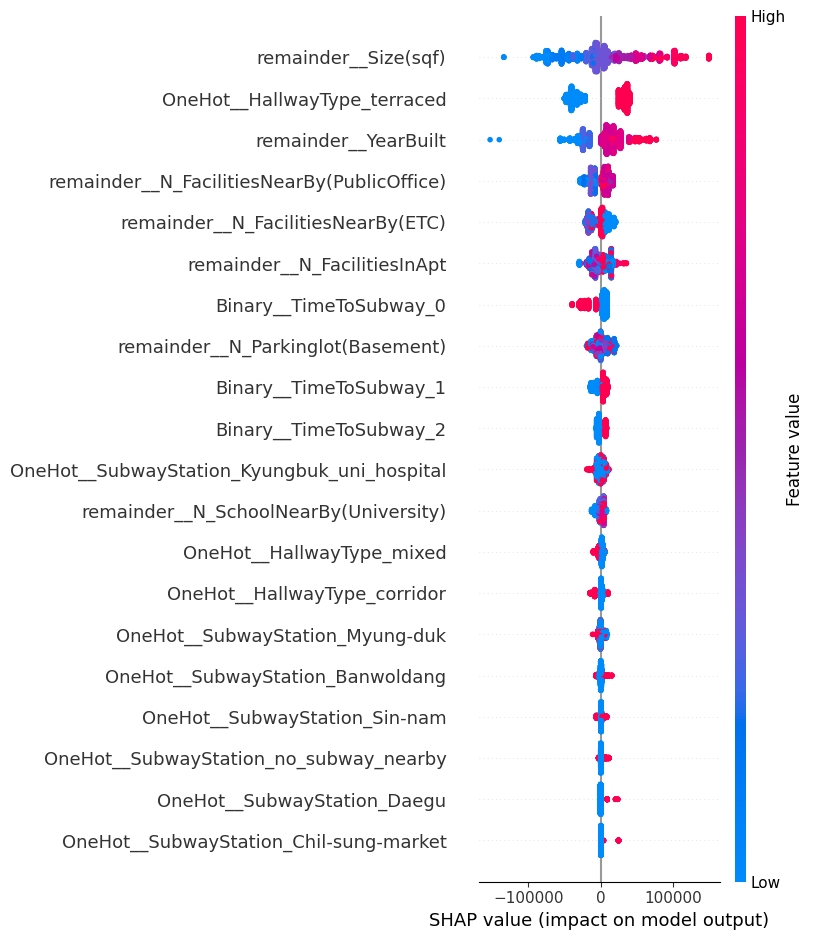

In [72]:
import shap

shap_values = shap.TreeExplainer(final_model['model'],
                                 data = X_train_encod,
                                 feature_perturbation = "interventional",
                                 model_output="raw").shap_values(X_train_encod)
                                 
shap.summary_plot(shap_values, X_train_encod, feature_names = transformer.get_feature_names_out())

***
$\mathbf{\text{How to Read}}$<br>
***
- `y` axis merupakan features yang dimiliki.
- `x` axis (SHAP) menjelaskan seberapa besar kontribusi setiap feature berdasarkan nilainya. Kontribusinya lebih tinggi ketika warna `merah`, dan sebaliknya rendah untuk warna `biru`. Penentuan warna didasarkan pada nilai terhadap pusat titik koordinat 0.0. Sisi kanansumbu 0.0 berarti mendukung prediksi dengan nilai hingga `100000`, sementara sisi kiri mendukung prediksi nilai `-100000`. Nilai SHAP dapat diartikan seperti koefisien `korelasi`, artinya magnitudi memiliki makna yang sama antara positif dan negatif.
- `Warna Merah dan Biru` menunjukkan bagaimana model menentukan apakah nilai SHAP mendukung prediksi bernilai `100000` atau `-100000`
- `Titik data` menunjukkan titik data sebenarnya dalam dataset. 

**Sidenotes:**

>  Kita dapat menyimpulkan bahwa secara keseluruhan top 5 features yang berkontribusi besar terhadap pemodelan adalah `Size(sqf)`, `HallwayType`, `YearBuilt`, `FacilitiesNearBy(PublicOffice)`, `FacilitiesInApt`. Fitur-fitur ini memiliki dampak yang signifikan terhadap hasil prediksi model. Memahami kontribusi fitur-fitur ini dapat membantu dalam mengidentifikasi faktor-faktor penting yang memengaruhi harga apartemen dan memperbaiki kualitas prediksi model

Selanjutnya kita juga bisa melihat lebih jauh **features** apa saja yang mempengaruhi tiap-tiap data pemodelan menggunakan teknik `LIME`

### **2. LIME (Local Interpretable Model-Agnostic Explanations)**

Teknik ini bekerja dengan cara mengambil instance data tertentu, pendekatan ini memungkinkan kita untuk memahami bagaimana keputusan model dibuat di sekitar titik data tertentu

In [73]:
import lime
from lime import lime_tabular

# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_encod),
    feature_names=X_train_encod.columns,
    mode='regression'
)

In [74]:
# Membandingkan dengan hasil aktual 
print(f"Nilai aktual nya sebesar: {y_test.iloc[9]}")

exp = explainer.explain_instance(
    data_row=X_test_encod.iloc[9], 
    predict_fn=final_model['model'].predict
)

exp.show_in_notebook(show_table=True)

Nilai aktual nya sebesar: 202654


***
$\mathbf{\text{How to Read}}$<br>
***
- `y` axis menjelaskan features yang dimiliki.
- `x` axis menjelaskan seberapa besar peluang untuk memprediksi nilai `(max)` dan nilai `(min)`
- `Warna Biru dan Orange` ketika berwarna biru menjelaskan features yang mendukung prediksi nilai `(min)`, sebaliknya ketika berwarna orange menjelaskan mengenai features yang mendukung prediksi nilai `(max)`.

**Sidenotes:**

>  Berdasarkan hasil prediksi features test (X_test) pada index `9` menjelaskan bahwa hasil prediksi dengan final model `(XGB)` diperoleh nilai `SalePrice` sebesar `211370.08` selisih sebesar *8716*  atau bisa disebut juga selisih sebesar `4.3%` dengan data actual. Dimana features-features yang berkontribusi tinggi yaitu `TimeToSubway`, `YearBuilt`, `HallwayType`, `SubwayStation`

## **Limitation Model**

- **Limitasi pada final model yang digunakan sebagai berikut :**

    | **Fitur** | **Tipe Data** | **Limitasi** | 
    | --- | --- | --- |
    | HallwayType | Object | Menggunakan semua data unik kolom (3 tipe koridor) |
    | TimeToSubway | Object | Menggunakan semua data unik kolom (5 jenis waktu) |
    | SubwayStation | Object | Menggunakan semua data unik kolom (8 station) |
    | N_FacilitiesNearBy(ETC) | Float | Menggunakan semua data unik kolom (4 values) |
    | N_FacilitiesNearBy(PublicOffice) | Float | Menggunakan semua data unik kolom (8 values) |
    | N_SchoolNearBy(PublicOffice) | Float | Menggunakan semua data unik kolom (6 values) |
    | N_Parkinglot(Basement) | Float | Menggunakan semua data unik kolom (20 values) |
    | YearBuilt | Integer | Menggunakan semua data dari tahun 1980 - 2015 (16 values) |
    | N_FacilitiesInApt | Integer | Menggunakan semua data unik kolom (9 values) |
    | Size(sqf) | Integer | Menggunakan semua data unik kolom (89 values) |
    | SalePrice | Integer | Menggunakan semua data unik kolom (838 values) |
&ensp;

## **Conclusion**

### **Pemilik Apartment**

- Top 5 features yang berpengaruh terhadap `harga jual apartment` yaitu,

1. **Size**
    - Ukuran atau luas apartemen memiliki pengaruh yang kuat terhadap harga jual.
    - Semakin besar ukuran apartemen, cenderung harga jualnya semakin tinggi
2. **HallwayType**
    - Jenis koridor atau akses ke unit apartemen juga mempengaruhi harga.
    - Beberapa tipe koridor mungkin memiliki preferensi yang berbeda-beda dari calon pembeli, sehingga mempengaruhi harga jualnya.
3. **YearBuilt**
    - Tahun pembangunan apartment memainkan peran penting dalam menentukan harga. 
    - Apartmen yang lebih baru atau yang mengikuti tren desain terkini cenderung memiliki harga yang lebih tinggi
4. **FacilitiesNearBy(PublicOffice)**:
    - Jumlah fasilitas yang terdekat dengan kantor publik di sekitar apartemen juga berkontribusi terhadap harga
    - Lokasi yang memiliki akses mudah ke fasilitas publik biasanya memiliki nilai yang lebih tinggi
5. **FacilitisInApt**
    - Jumlah fasilitas yang tersedia di dalam unit apatment sendiri juga menjadi faktor penentu harga.
    - Semakin lengkap fasilitas yang dimiliki apartmen, semakin tinggi nilai jualnya

Dengan memahami faktor-faktor ini, pemilik apartemen dapat menentukan harga jual yang lebih akurat dan sesuai dengan kondisi pasar serta preferensi calon pembeli. 

### **Pemodelan**

Perolehan score `MAPE` sebesar **`17%`** dengan nilai error `RMSE` sebesar **46147** dengan rasio **overestimated** (hasil prediksi jauh lebih tinggi dari aktual) sebesar **`1.45%`** dan rasio **underestimated** (hasil prediksi jauh lebih rendah dari aktual) sebesar **`1.8%`** 

Model ini tentu masih dapat diimprovisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Dengan cara seperti:

## **Rekomendasi**

### **Pemilik Apartment**

1. **Ukuran (size) apartment**
    - karena ukuran apartemen memiliki pengaruh yang signifikan pada harga jual, pemilik apartemen dapat mempertimbangkan startegi pemasaran yang menekankan ukuran yang lebih besar.
    - ini dapat mencakup penonjolan ruang yang luas dan membuat calon pembeli merasa bahwa mereka mendapatkan nilai lebih dengan ukuran yang lebih besar.

2. **HallwayType atau Koridor**
    - Pemilik apartment dapat menggunakan informasi ini untuk menyoroti jenis **Koridor** yang ada di kompleks apartment mereka.
    - Jika **koridor** tipe tertentu, seperti **teraced**, yang berdampak positif terhadap harga, pemilik dapat menyoroti kualitas atau manfaat khusus dari jenis **koridor** ini kepada calon pembeli

3. **Tahun Pembuatan (YearBuilt)**
    - Pemilik dapat memanfaatkannya dengan menyoroti karakteristik bangunan yang sesuai dengan era atau gaya arsitektur dari tahun tersebut.
    - Jika apartemen memiliki elemen khas dari era tersebut, ini dapat menjadi titik penjualan yang menarik

4. **Fasilitas di Sekitar Kantor Public**
    - Pemilik dapat menyoroti keberadaan fasilitas ini dan dampaknya pada kenyamanan dan aksebilitas para penghuni apartemen, terutama mereka yang memerlukan akses ke kantor publik

5. **Fasilitas di dalam Apartmen**
    - Pemilik dapat menyoroti fasilitas yang ada di dalamnya dengan menonjolkan kepraktisan dan kenyamanan yang ditawarkan oleh fasilitas ini

### **Pemodelan**

1. **A/B testing**
    - Melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan harga jual apartment.
2. **Cross-validation lebih mendalam**
    - Mempertimbangkan menggunakan nilai k yang lebih besar
3. **Teknik ensamble yang lebih kompleks** 
    - Menggunakan teknik Grid Search dengan rentang nilai yang lebih luas
    - Menambah features-features seperti (Jumlah kamar, Tipe apartemen full-furnish atau semi-furnish, Biaya lain bulanan, dll)